# import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

# Read Dataset and show some information

In [2]:
data_path = "C:\\Users\\MOHAMED\\Desktop\\regression_data.xls"

data = pd.read_excel(data_path)
data=(data-data.mean())/data.std()

In [3]:
data.head()

,AT,V,AP,RH,PE
0,-0.629486,-0.987245,1.820393,-0.009519,0.521181
1,0.741870,0.681010,1.141803,-0.974570,-0.585634
2,-1.951195,-1.172956,-0.185068,1.289772,2.003574
3,0.162197,0.237191,-0.508366,0.228148,-0.462003
4,-1.185007,-1.322470,-0.678435,1.596616,1.144606


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:
data.describe()

,AT,V,AP,RH,PE
count,9.568000e+03,9.568000e+03,9.568000e+03,9.568000e+03,9.568000e+03
mean,-6.851427e-15,-1.758375e-14,-4.731121e-13,7.452041e-15,-5.175128e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.394001e+00,-2.277782e+00,-3.429840e+00,-3.270418e+00,-1.998302e+00
25%,-8.240528e-01,-9.888188e-01,-7.003249e-01,-6.836503e-01,-8.563317e-01
50%,9.309243e-02,-1.751513e-01,-5.372787e-02,1.141090e-01,-1.649388e-01
75%,8.143295e-01,9.627242e-01,6.736938e-01,7.890966e-01,8.241047e-01
max,2.342681e+00,2.144667e+00,3.374584e+00,1.839077e+00,2.425441e+00


In [6]:
correlation__matrix = data.corr()
print(correlation__matrix)

          AT         V        AP        RH        PE
AT  1.000000  0.844107 -0.507549 -0.542535 -0.948128
V   0.844107  1.000000 -0.413502 -0.312187 -0.869780
AP -0.507549 -0.413502  1.000000  0.099574  0.518429
RH -0.542535 -0.312187  0.099574  1.000000  0.389794
PE -0.948128 -0.869780  0.518429  0.389794  1.000000


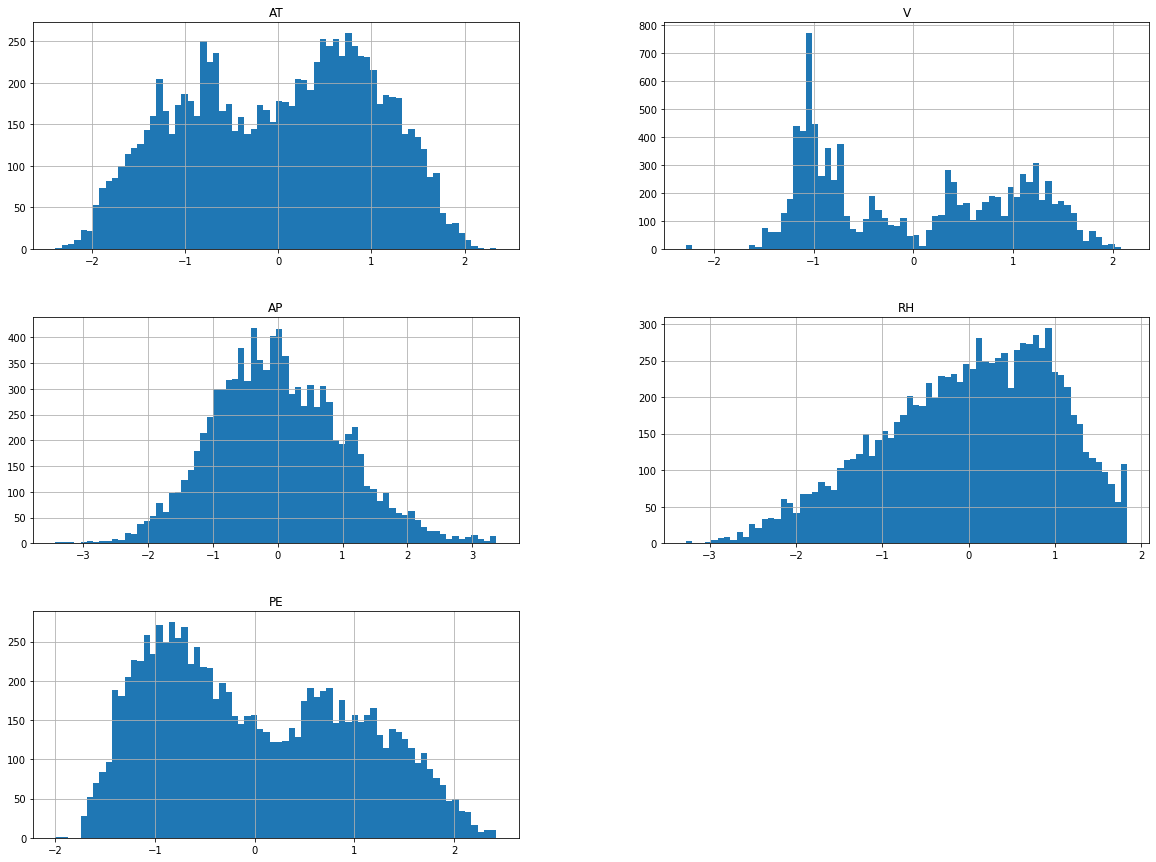

In [7]:
data.hist(bins=70, figsize=(20,15))
plt.show()

# Create Dataset

In [8]:
data_AT_V = data.iloc[:, 0:2]
data_AT_AP = data.iloc[:, [0,2]]
data_AT_RH = data.iloc[:, [0,3]]
data_V_AP = data.iloc[:, [1,2]]
data_V_RH = data.iloc[:, [1,3]]
data_AP_RH = data.iloc[:, [2,3]]
data_Y = data.iloc[:, -1]

In [9]:
from sklearn.model_selection import train_test_split
 
X_train_AT_V, X_test_AT_V, y_train_AT_V, y_test_AT_V = train_test_split(data_AT_V,data_Y, test_size=0.5, random_state=42, shuffle= True)
X_train_AT_AP, X_test_AT_AP, y_train_AT_AP, y_test_AT_AP = train_test_split(data_AT_AP,data_Y, test_size=0.5, random_state=42, shuffle= True)
X_train_AT_RH, X_test_AT_RH, y_train_AT_RH, y_test_AT_RH = train_test_split(data_AT_RH,data_Y, test_size=0.5, random_state=42, shuffle= True)
X_train_V_AP, X_test_V_AP, y_train_V_AP, y_test_V_AP = train_test_split(data_V_AP,data_Y, test_size=0.5, random_state=42, shuffle= True)
X_train_V_RH, X_test_V_RH, y_train_V_RH, y_test_V_RH = train_test_split(data_V_RH,data_Y, test_size=0.5, random_state=42, shuffle= True)
X_train_AP_RH, X_test_AP_RH, y_train_AP_RH, y_test_AP_RH = train_test_split(data_AP_RH,data_Y, test_size=0.5, random_state=42, shuffle= True)


X_train_AT_V = X_train_AT_V.to_numpy()
y_train_AT_V = y_train_AT_V.to_numpy()
X_test_AT_V = X_test_AT_V.to_numpy()
y_test_AT_V = y_test_AT_V.to_numpy()

X_train_AT_AP = X_train_AT_AP.to_numpy()
y_train_AT_AP = y_train_AT_AP.to_numpy()
X_test_AT_AP = X_test_AT_AP.to_numpy()
y_test_AT_AP = y_test_AT_AP.to_numpy()

X_train_AT_RH = X_train_AT_RH.to_numpy()
y_train_AT_RH = y_train_AT_RH.to_numpy()
X_test_AT_RH = X_test_AT_RH.to_numpy()
y_test_AT_RH = y_test_AT_RH.to_numpy()

X_train_V_AP = X_train_V_AP.to_numpy()
y_train_V_AP = y_train_V_AP.to_numpy()
X_test_V_AP = X_test_V_AP.to_numpy()
y_test_V_AP = y_test_V_AP.to_numpy()

X_train_V_RH = X_train_V_RH.to_numpy()
y_train_V_RH = y_train_V_RH.to_numpy()
X_test_V_RH = X_test_V_RH.to_numpy()
y_test_V_RH = y_test_V_RH.to_numpy()

X_train_AP_RH = X_train_AP_RH.to_numpy()
y_train_AP_RH = y_train_AP_RH.to_numpy()
X_test_AP_RH = X_test_AP_RH.to_numpy()
y_test_AP_RH = y_test_AP_RH.to_numpy()

# Train Models

In [10]:
Reg_AT_V = LinearRegression()
Reg_AT_V.fit(X_train_AT_V, y_train_AT_V)

Reg_AT_AP = LinearRegression()
Reg_AT_AP.fit(X_train_AT_AP, y_train_AT_AP)

Reg_AT_RH = LinearRegression()
Reg_AT_RH.fit(X_train_AT_RH, y_train_AT_RH)

Reg_V_AP = LinearRegression()
Reg_V_AP.fit(X_train_V_AP, y_train_V_AP)

Reg_V_RH = LinearRegression()
Reg_V_RH.fit(X_train_V_RH, y_train_V_RH)

Reg_AP_RH = LinearRegression()
Reg_AP_RH.fit(X_train_AP_RH, y_train_AP_RH)

LinearRegression()

# Predictions

In [11]:
# AT_V Prediction 
Predict_AT_V_Train = Reg_AT_V.predict(X_train_AT_V)
Error_AT_V_train = ((mean_squared_error(y_train_AT_V, Predict_AT_V_Train)))

print("l'erreur du Training pour AT_V est: {}".format(Error_AT_V_train))

Predict_AT_V_Test = Reg_AT_V.predict(X_test_AT_V)
Error_AT_V_Test = ((mean_squared_error(y_test_AT_V, Predict_AT_V_Train)))

print("l'erreur du Test pour AT_V est: {}".format(Error_AT_V_train))


# AT_AP Prediction 
Predict_AT_AP_Train = Reg_AT_AP.predict(X_train_AT_AP)

Error_AT_AP_train = ((mean_squared_error(y_train_AT_AP, Predict_AT_AP_Train)))

print("l'erreur du Training pour AT_AP est: {}".format(Error_AT_AP_train))


Predict_AT_AP_Test = Reg_AT_AP.predict(X_test_AT_AP)

Error_AT_AP_Test = ((mean_squared_error(y_test_AT_RH, Predict_AT_AP_Test)))

print("l'erreur du Test pour AT_AP est: {}".format(Error_AT_AP_Test))

# AT_RH Prediction 
Predict_AT_RH_Train = Reg_AT_RH.predict(X_train_AT_RH)

Error_AT_RH_train = ((mean_squared_error(y_train_AT_RH, Predict_AT_RH_Train)))

print("l'erreur du Training pour AT_RH est: {}".format(Error_AT_RH_train))


Predict_AT_RH_Test = Reg_AT_RH.predict(X_test_AT_RH)

Error_AT_RH_Test = ((mean_squared_error(y_test_AT_RH, Predict_AT_RH_Test)))

print("l'erreur du Test pour AT_RH est: {}".format(Error_AT_RH_Test))

# V_AP Prediction 
Predict_V_AP_Train = Reg_V_AP.predict(X_train_V_AP)

Error_V_AP_train = ((mean_squared_error(y_train_V_AP, Predict_V_AP_Train)))

print("l'erreur du Training pour V_AP est: {}".format(Error_V_AP_train))


Predict_V_AP_Test = Reg_V_AP.predict(X_test_V_AP)

Error_V_AP_Test = ((mean_squared_error(y_test_V_AP, Predict_V_AP_Test)))

print("l'erreur du Test pour V_AP est: {}".format(Error_V_AP_Test))


# V_RH Prediction 
Predict_V_RH_Train = Reg_V_RH.predict(X_train_V_RH)

Error_V_RH_train = ((mean_squared_error(y_train_V_RH, Predict_V_RH_Train)))

print("l'erreur du Training pour V_RH est: {}".format(Error_V_RH_train))


Predict_V_RH_Test = Reg_V_RH.predict(X_test_V_RH)

Error_V_RH_Test = ((mean_squared_error(y_test_V_RH, Predict_V_RH_Test)))

print("l'erreur du Test pour V_RH est: {}".format(Error_V_RH_Test))

# AP_RH Prediction 
Predict_AP_RH_Train = Reg_AP_RH.predict(X_train_AP_RH)

Error_AP_RH_train = ((mean_squared_error(y_train_AP_RH, Predict_AP_RH_Train)))

print("l'erreur du Training pour AP_RH est: {}".format(Error_AP_RH_train))


Predict_AP_RH_Test = Reg_AP_RH.predict(X_test_AP_RH)

Error_AP_RH_Test = ((mean_squared_error(y_test_AP_RH, Predict_AP_RH_Test)))

print("l'erreur du Test pour AP_RH est: {}".format(Error_AP_RH_Test))

l'erreur du Training pour AT_V est: 0.08165497702334314
l'erreur du Test pour AT_V est: 0.08165497702334314
l'erreur du Training pour AT_AP est: 0.09733090222637758
l'erreur du Test pour AT_AP est: 0.10110470501378505
l'erreur du Training pour AT_RH est: 0.07710562264331283
l'erreur du Test pour AT_RH est: 0.0810117358798194
l'erreur du Training pour V_AP est: 0.21683596329195015
l'erreur du Test pour V_AP est: 0.2093780687096865
l'erreur du Training pour V_RH est: 0.22700372263089225
l'erreur du Test pour V_RH est: 0.229062866705854
l'erreur du Training pour AP_RH est: 0.6241264245122499
l'erreur du Test pour AP_RH est: 0.6077335003959556


# Coefficients

In [12]:
print('The coefficients AT_V:')
print('B0:', Reg_AT_V.intercept_)
print('Bk:', Reg_AT_V.coef_)
print('\n')
print('The coefficients AT_AP:')
print('B0:', Reg_AT_AP.intercept_)
print('Bk:', Reg_AT_AP.coef_)
print('\n')
print('The coefficients AT_RH:')
print('B0:', Reg_AT_RH.intercept_)
print('Bk:', Reg_AT_RH.coef_)
print('\n')
print('The coefficients AT_RH:')
print('B0:', Reg_V_AP.intercept_)
print('Bk:', Reg_V_AP.coef_)
print('\n')
print('The coefficients AT_RH:')
print('B0:', Reg_V_RH.intercept_)
print('Bk:', Reg_V_RH.coef_)
print('\n')
print('The coefficients AP_RH:')
print('B0:', Reg_AP_RH.intercept_)
print('Bk:', Reg_AP_RH.coef_)

The coefficients AT_V:
B0: -0.00168360395623896
Bk: [-0.74711562 -0.2423361 ]


The coefficients AT_AP:
B0: -0.0005881046180536541
Bk: [-0.92842017  0.04323627]


The coefficients AT_RH:
B0: -0.002130975999882519
Bk: [-1.04582247 -0.17478389]


The coefficients AT_RH:
B0: -0.0017316576966641874
Bk: [-0.79598321  0.18398638]


The coefficients AT_RH:
B0: -0.0012623637875324566
Bk: [-0.82865731  0.13939616]


The coefficients AP_RH:
B0: 0.008138882021330512
Bk: [0.47144163 0.3368937 ]


In [13]:
b_AT_V = np.hstack([Reg_AT_V.intercept_, Reg_AT_V.coef_])

b_AT_AP = np.hstack([Reg_AT_AP.intercept_, Reg_AT_AP.coef_])

b_AT_RH = np.hstack([Reg_AT_RH.intercept_, Reg_AT_RH.coef_])

b_V_AP = np.hstack([Reg_V_AP.intercept_, Reg_V_AP.coef_])

b_V_RH = np.hstack([Reg_V_RH.intercept_, Reg_V_RH.coef_])

b_AP_RH = np.hstack([Reg_AP_RH.intercept_, Reg_AP_RH.coef_])

In [14]:
# Get the predictors
predictors_names_AT_V =  list(data[['AT','V']].columns)
predictors_names_AT_AP =  list(data[['AT','AP']].columns)
predictors_names_AT_RH =  list(data[['AT','RH']].columns)
predictors_names_V_AP =  list(data[['V','AP']].columns)
predictors_names_V_RH =  list(data[['V','RH']].columns) 
predictors_names_AP_RH =  list(data[['AP','RH']].columns) 

predictors_names_AT_V.insert(0, "X0")
predictors_names_AT_AP.insert(0, "X0") 
predictors_names_AT_RH.insert(0, "X0") 
predictors_names_V_AP.insert(0, "X0") 
predictors_names_V_RH.insert(0, "X0")  
predictors_names_AP_RH.insert(0, "X0")

In [15]:
# Create the pandas DataFrame AT_V
df_AT_V = pd.DataFrame(zip(predictors_names_AT_V,b_AT_V), index=["B0", "B1","B2"], columns = ['features', 'Coefficients'])
df_AT_AP = pd.DataFrame(zip(predictors_names_AT_AP,b_AT_AP), index=["B0", "B1","B2"], columns = ['features', 'Coefficients'])
df_AT_RH = pd.DataFrame(zip(predictors_names_AT_RH,b_AT_RH), index=["B0", "B1","B2"], columns = ['features', 'Coefficients'])
df_V_AP = pd.DataFrame(zip(predictors_names_V_AP,b_V_AP), index=["B0", "B1","B2"], columns = ['features', 'Coefficients'])
df_V_RH = pd.DataFrame(zip(predictors_names_V_RH,b_V_RH), index=["B0", "B1","B2"], columns = ['features', 'Coefficients'])
df_AP_RH = pd.DataFrame(zip(predictors_names_AP_RH,b_AP_RH), index=["B0", "B1","B2"], columns = ['features', 'Coefficients'])

# Plot Graphs

In [16]:
def plot_LR(X,y, ax, b):

  x1fit = np.arange(X[:,0].min(),X[:,0].max() +1,step=0.1)
  x2fit = np.arange(X[:,1].min(),X[:,1].max() +1,step=0.1)
  X1FIT,X2FIT = np.meshgrid(x1fit,x2fit)  
  YFIT = b[0] + b[1]*X1FIT + b[2]*X2FIT 
  ax.plot(X[:,0], X[:,1], y, color='b', zorder=15, linestyle='none', marker='o', alpha=0.5)
  ax.plot(X1FIT.flatten(), X2FIT.flatten(), YFIT.flatten(), color='#95d0fc', zorder=15, linestyle='none', marker='o', alpha=0.15)
  ax.set_zlabel("énergie électrique", fontsize=12)
  return ax


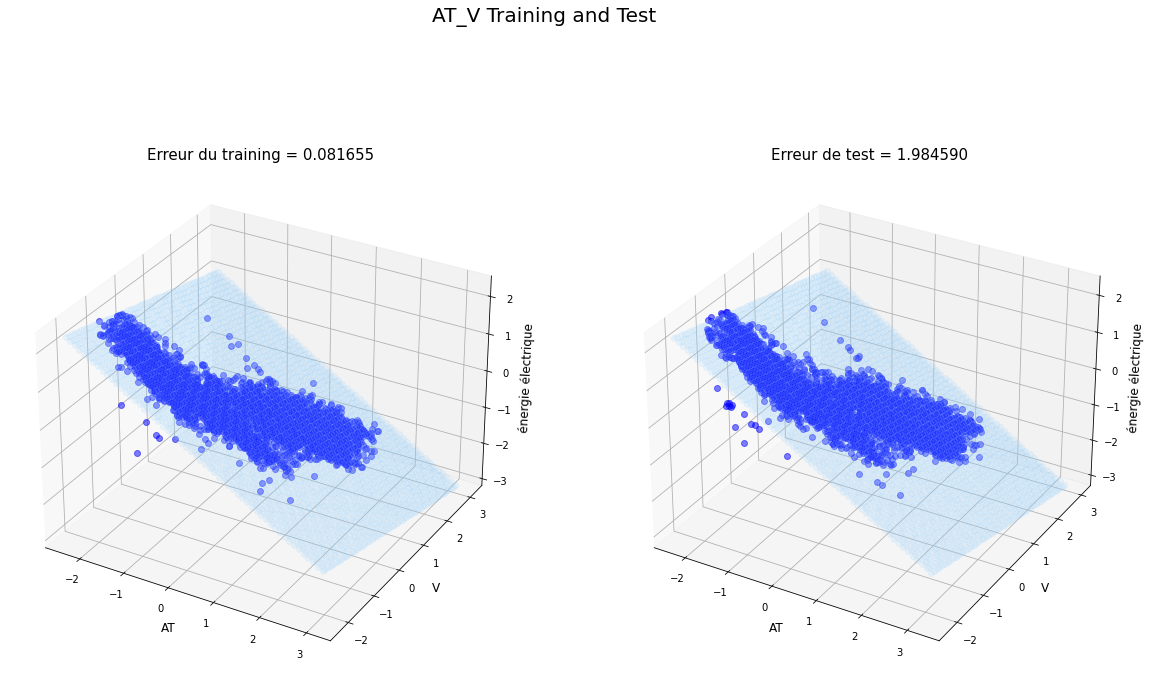

In [17]:
fig = plt.figure(figsize=(20, 12)) 
ax_AT_V = fig.add_subplot(1, 2, 1, projection="3d")
ax_AT_V = plot_LR(X_train_AT_V, y_train_AT_V, ax_AT_V,b_AT_V)
ax_AT_V.set_title("Erreur du training = %.6f" % Error_AT_V_train, fontsize=15);
ax_AT_V.set_xlabel("AT", fontsize=12) 
ax_AT_V.set_ylabel("V", fontsize=12)
ax_AT_V = fig.add_subplot(1, 2, 2, projection='3d')
ax_AT_V = plot_LR(X_test_AT_V, y_test_AT_V,ax_AT_V, b_AT_V)
ax_AT_V.set_title('Erreur de test = %.6f' % Error_AT_V_Test, fontsize=15);
ax_AT_V.set_xlabel("AT", fontsize=12) 
ax_AT_V.set_ylabel("V", fontsize=12)
fig.suptitle("AT_V Training and Test ", fontsize=20);

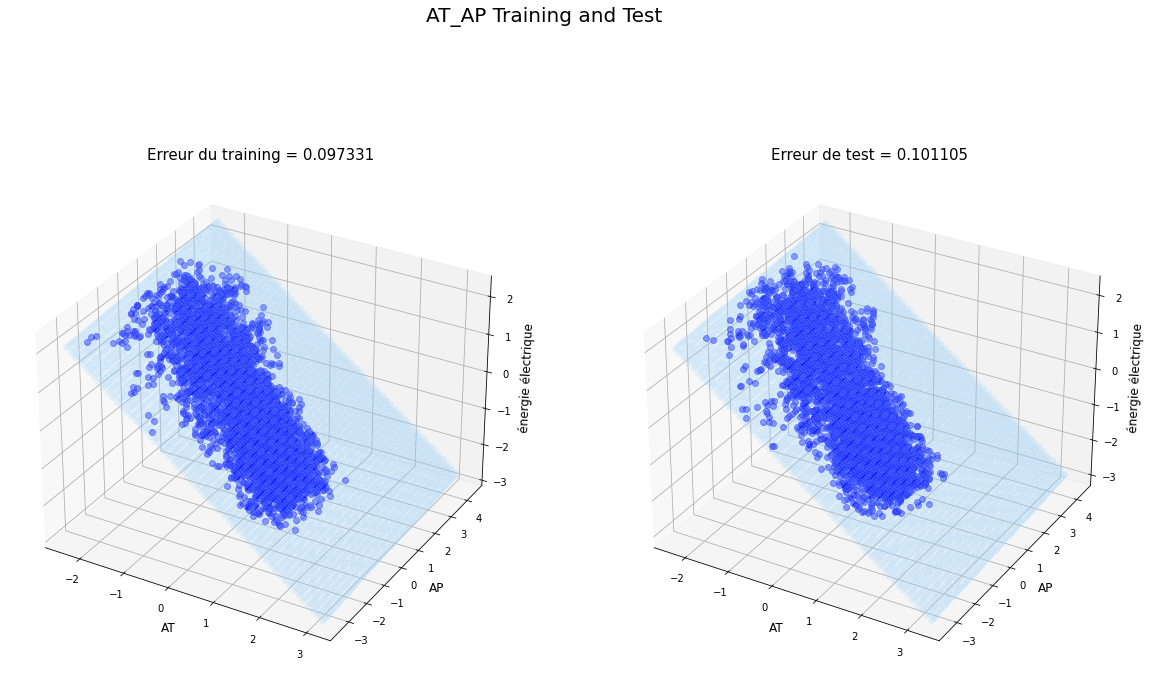

In [18]:
fig = plt.figure(figsize=(20, 12)) 
ax_AT_AP = fig.add_subplot(1, 2, 1, projection="3d")
ax_AT_AP = plot_LR(X_train_AT_AP, y_train_AT_AP, ax_AT_AP,b_AT_AP)
ax_AT_AP.set_title("Erreur du training = %.6f" % Error_AT_AP_train, fontsize=15);
ax_AT_AP.set_xlabel("AT", fontsize=12) 
ax_AT_AP.set_ylabel("AP", fontsize=12)
ax_AT_AP = fig.add_subplot(1, 2, 2, projection='3d')
ax_AT_AP = plot_LR(X_test_AT_AP, y_test_AT_AP,ax_AT_AP, b_AT_AP)
ax_AT_AP.set_title('Erreur de test = %.6f' % Error_AT_AP_Test, fontsize=15);
ax_AT_AP.set_xlabel("AT", fontsize=12) 
ax_AT_AP.set_ylabel("AP", fontsize=12)
fig.suptitle("AT_AP Training and Test ", fontsize=20);

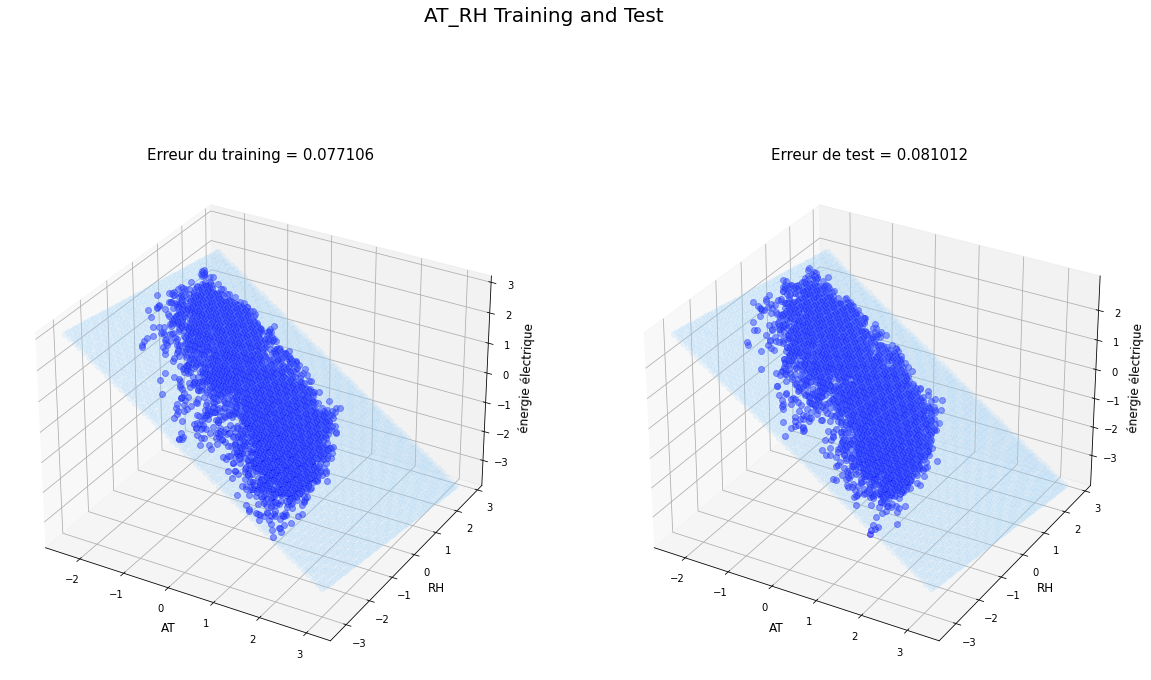

In [19]:
fig = plt.figure(figsize=(20, 12)) 
ax_AT_RH = fig.add_subplot(1, 2, 1, projection="3d")
ax_AT_RH = plot_LR(X_train_AT_RH, y_train_AT_RH, ax_AT_RH,b_AT_RH)
ax_AT_RH.set_title("Erreur du training = %.6f" % Error_AT_RH_train, fontsize=15);
ax_AT_RH.set_xlabel("AT", fontsize=12) 
ax_AT_RH.set_ylabel("RH", fontsize=12)
ax_AT_RH = fig.add_subplot(1, 2, 2, projection='3d')
ax_AT_RH = plot_LR(X_test_AT_RH, y_test_AT_RH,ax_AT_RH, b_AT_RH)
ax_AT_RH.set_title('Erreur de test = %.6f' % Error_AT_RH_Test, fontsize=15);
ax_AT_RH.set_xlabel("AT", fontsize=12) 
ax_AT_RH.set_ylabel("RH", fontsize=12)
fig.suptitle("AT_RH Training and Test ", fontsize=20);

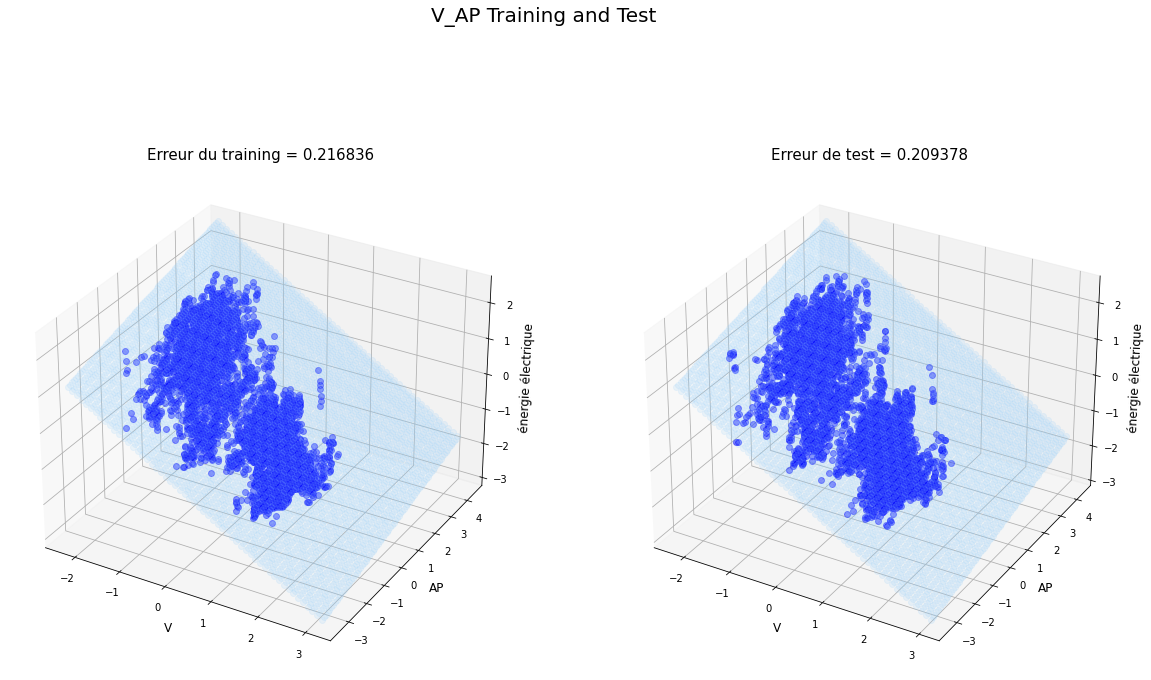

In [20]:
fig = plt.figure(figsize=(20, 12)) 
ax_V_AP = fig.add_subplot(1, 2, 1, projection="3d")
ax_V_AP = plot_LR(X_train_V_AP, y_train_V_AP, ax_V_AP,b_V_AP)
ax_V_AP.set_title("Erreur du training = %.6f" % Error_V_AP_train, fontsize=15);
ax_V_AP.set_xlabel("V", fontsize=12) 
ax_V_AP.set_ylabel("AP", fontsize=12)
ax_V_AP = fig.add_subplot(1, 2, 2, projection='3d')
ax_V_AP = plot_LR(X_test_V_AP, y_test_V_AP,ax_V_AP, b_V_AP)
ax_V_AP.set_title('Erreur de test = %.6f' % Error_V_AP_Test, fontsize=15);
ax_V_AP.set_xlabel("V", fontsize=12) 
ax_V_AP.set_ylabel("AP", fontsize=12)
fig.suptitle("V_AP Training and Test ", fontsize=20);

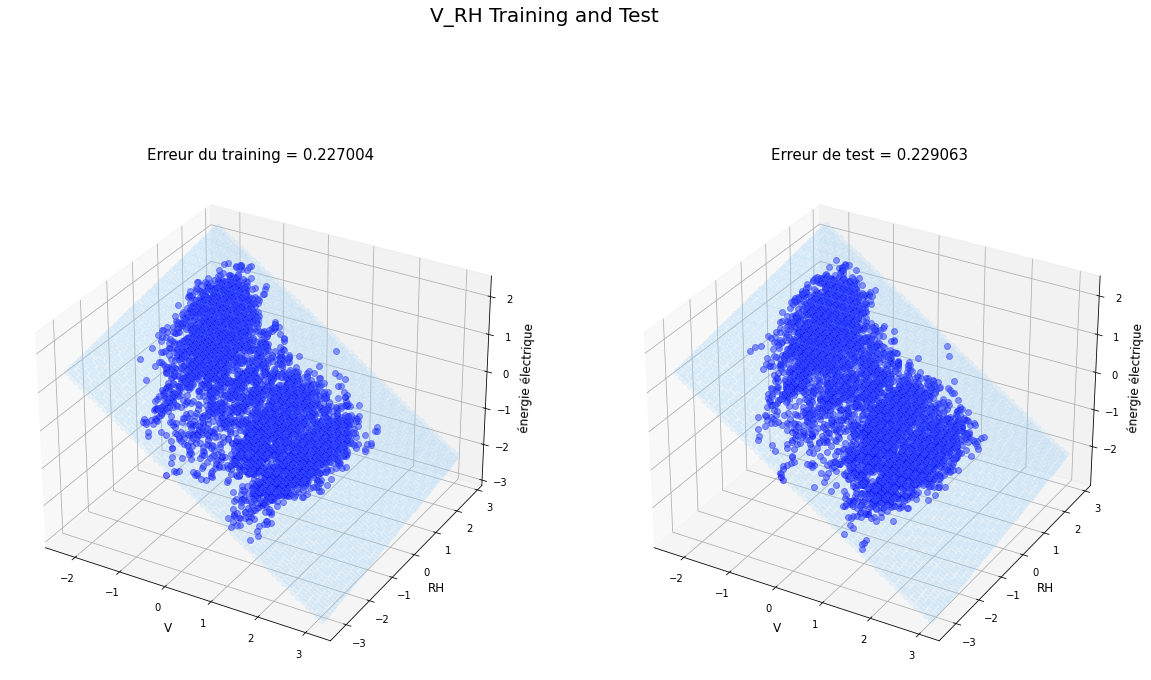

In [21]:
fig = plt.figure(figsize=(20, 12)) 
ax_V_RH = fig.add_subplot(1, 2, 1, projection="3d")
ax_V_RH = plot_LR(X_train_V_RH, y_train_V_RH, ax_V_RH,b_V_RH)
ax_V_RH.set_title("Erreur du training = %.6f" % Error_V_RH_train, fontsize=15);
ax_V_RH.set_xlabel("V", fontsize=12) 
ax_V_RH.set_ylabel("RH", fontsize=12)
ax_V_RH = fig.add_subplot(1, 2, 2, projection='3d')
ax_V_RH = plot_LR(X_test_V_RH, y_test_V_RH,ax_V_RH, b_V_RH)
ax_V_RH.set_title('Erreur de test = %.6f' % Error_V_RH_Test, fontsize=15);
ax_V_RH.set_xlabel("V", fontsize=12) 
ax_V_RH.set_ylabel("RH", fontsize=12)
fig.suptitle("V_RH Training and Test ", fontsize=20);

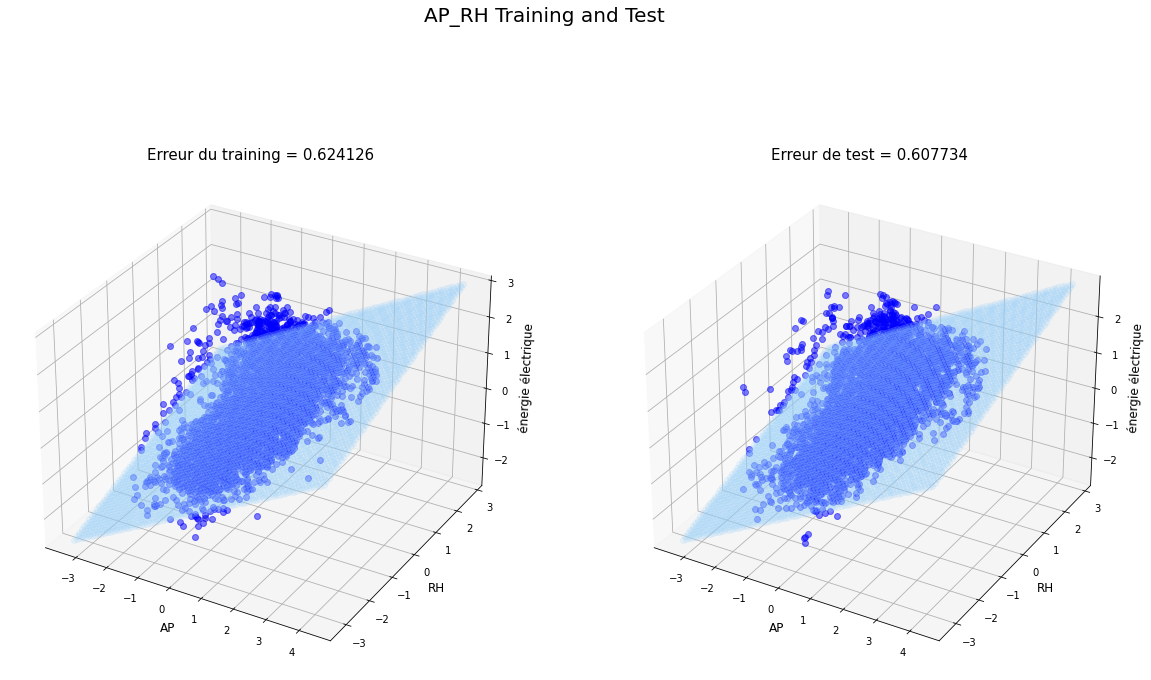

In [22]:
fig = plt.figure(figsize=(20, 12)) 
ax_AP_RH = fig.add_subplot(1, 2, 1, projection="3d")
ax_AP_RH = plot_LR(X_train_AP_RH, y_train_AP_RH, ax_AP_RH,b_AP_RH)
ax_AP_RH.set_title("Erreur du training = %.6f" % Error_AP_RH_train, fontsize=15);
ax_AP_RH.set_xlabel("AP", fontsize=12) 
ax_AP_RH.set_ylabel("RH", fontsize=12)
ax_AP_RH = fig.add_subplot(1, 2, 2, projection='3d')
ax_AP_RH = plot_LR(X_test_AP_RH, y_test_AP_RH,ax_AP_RH, b_AP_RH)
ax_AP_RH.set_title('Erreur de test = %.6f' % Error_AP_RH_Test, fontsize=15);
ax_AP_RH.set_xlabel("AP", fontsize=12) 
ax_AP_RH.set_ylabel("RH", fontsize=12)
fig.suptitle("AP_RH Training and Test ", fontsize=20);